# Trình bày 2 hàm tối ưu hóa liên tục

## 1. Hàm Ackley
Hàm Ackley là một hàm benchmark phổ biến trong tối ưu hóa, có nhiều cực trị cục bộ nhưng chỉ một cực tiểu toàn cục.

**Công thức:**
$$f(x) = -a \cdot e^{-b\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}} - e^{\frac{1}{n}\sum_{i=1}^{n}\cos(cx_i)} + a + e$$

Với:
- $a = 20$
- $b = 0.2$ 
- $c = 2\pi$
- $n$ = số chiều

**Đặc điểm:**
- Miền xác định: thường là $[-5, 5]$ hoặc $[-32.768, 32.768]$
- Cực tiểu toàn cục: $f(0, 0, ..., 0) = 0$
- Hàm có bề mặt gồ ghề với nhiều cực trị cục bộ

---

## 2. Hàm Rosenbrock (Banana Function)
Hàm Rosenbrock còn gọi là hàm "chuối" vì hình dạng đặc trưng của nó, là một hàm khó tối ưu do thung lũng hẹp và cong.

**Công thức:**
$$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]$$

**Đặc điểm:**
- Miền xác định: thường là $[-5, 5]$ hoặc $[-2.048, 2.048]$
- Cực tiểu toàn cục: $f(1, 1, ..., 1) = 0$
- Hàm có thung lũng hẹp dạng parabol, khó tìm được điểm tối ưu

---

# Vẽ biểu đồ

In [47]:
# Import thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Thiết lập font và kích thước hình
plt.rcParams['figure.figsize'] = (16, 7)
plt.rcParams['font.size'] = 10

In [48]:
# Định nghĩa hàm Ackley
def ackley_function(x, y, a=20, b=0.2, c=2*np.pi):
    """
    Hàm Ackley 2 chiều
    """
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    result = term1 + term2 + a + np.e
    return result

# Định nghĩa hàm Rosenbrock
def rosenbrock_function(x, y):
    """
    Hàm Rosenbrock 2 chiều
    """
    return 100 * (y - x**2)**2 + (1 - x)**2

In [49]:
# Tạo lưới điểm để vẽ
# Cho hàm Ackley
x_ackley = np.linspace(-5, 5, 200)
y_ackley = np.linspace(-5, 5, 200)
X_ackley, Y_ackley = np.meshgrid(x_ackley, y_ackley)
Z_ackley = ackley_function(X_ackley, Y_ackley)

# Cho hàm Rosenbrock
x_rosen = np.linspace(-2, 2, 200)
y_rosen = np.linspace(-1, 3, 200)
X_rosen, Y_rosen = np.meshgrid(x_rosen, y_rosen)
Z_rosen = rosenbrock_function(X_rosen, Y_rosen)

print("Dữ liệu đã được tạo thành công!")
print(f"Hàm Ackley: Giá trị min = {Z_ackley.min():.6f}, max = {Z_ackley.max():.6f}")
print(f"Hàm Rosenbrock: Giá trị min = {Z_rosen.min():.6f}, max = {Z_rosen.max():.6f}")

Dữ liệu đã được tạo thành công!
Hàm Ackley: Giá trị min = 0.133844, max = 14.302665
Hàm Rosenbrock: Giá trị min = 0.000025, max = 2509.000000


## Vẽ biểu đồ 3D

### Hàm Ackley - Biểu đồ 3D

C:\Users\luuth\AppData\Local\Temp\ipykernel_6136\733808537.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


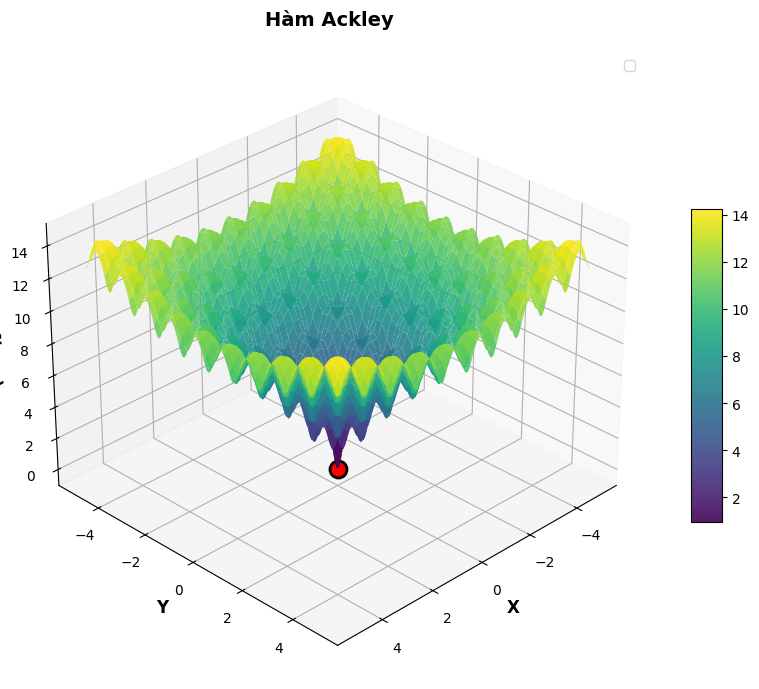

📊 Biểu đồ 3D hàm Ackley đã được vẽ!


In [50]:
# Vẽ hàm Ackley 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ bề mặt 3D
surf = ax.plot_surface(X_ackley, Y_ackley, Z_ackley, 
                       cmap=cm.viridis,
                       linewidth=0, 
                       antialiased=True,
                       alpha=0.9)

# Đánh dấu điểm cực tiểu toàn cục (0, 0, 0)
ax.scatter([0], [0], [0], color='red', s=150, edgecolors='black', linewidths=2)

# Cài đặt nhãn và tiêu đề
ax.set_xlabel('X', fontsize=12, fontweight='bold')
ax.set_ylabel('Y', fontsize=12, fontweight='bold')
ax.set_zlabel('f(x, y)', fontsize=12, fontweight='bold')
ax.set_title('Hàm Ackley', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right')

# Thêm colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Điều chỉnh góc nhìn
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

print("📊 Biểu đồ 3D hàm Ackley đã được vẽ!")

### Hàm Rosenbrock - Biểu đồ 3D

C:\Users\luuth\AppData\Local\Temp\ipykernel_6136\4282937310.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


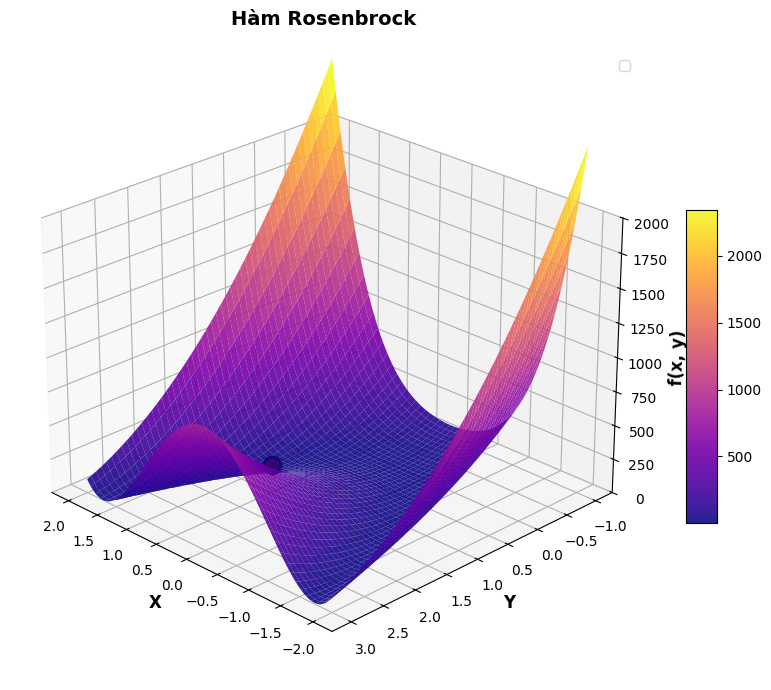

📊 Biểu đồ 3D hàm Rosenbrock đã được vẽ!
   Lưu ý: Trục Z giới hạn từ 0-2000 để dễ quan sát thung lũng


In [51]:
# Vẽ hàm Rosenbrock 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ bề mặt 3D (không dùng log, vẽ trực tiếp)
surf = ax.plot_surface(X_rosen, Y_rosen, Z_rosen, 
                       cmap=cm.plasma,
                       linewidth=0, 
                       antialiased=True,
                       alpha=0.9)

# Đánh dấu điểm cực tiểu toàn cục (1, 1, 0)
ax.scatter([1], [1], [0], color='red', s=150, edgecolors='black', linewidths=2)

# Cài đặt nhãn và tiêu đề
ax.set_xlabel('X', fontsize=12, fontweight='bold')
ax.set_ylabel('Y', fontsize=12, fontweight='bold')
ax.set_zlabel('f(x, y)', fontsize=12, fontweight='bold')
ax.set_title('Hàm Rosenbrock', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right')

# Giới hạn trục Z để dễ quan sát (vì giá trị có thể rất lớn)
ax.set_zlim(0, 2000)

# Thêm colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Điều chỉnh góc nhìn
ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()

print("📊 Biểu đồ 3D hàm Rosenbrock đã được vẽ!")
print(f"   Lưu ý: Trục Z giới hạn từ 0-2000 để dễ quan sát thung lũng")

## Vẽ biểu đồ Contour (đường đồng mức)

### Hàm Ackley - Contour Plot

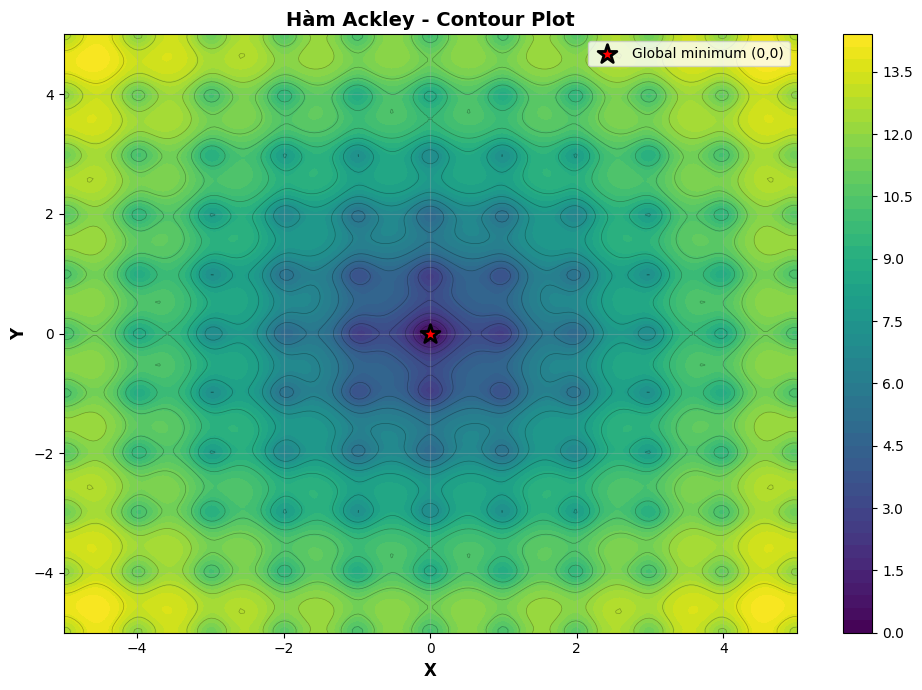

📈 Biểu đồ contour hàm Ackley đã được vẽ!


In [52]:
# Vẽ contour plot cho hàm Ackley
fig, ax = plt.subplots(figsize=(10, 7))

contour = ax.contourf(X_ackley, Y_ackley, Z_ackley, levels=50, cmap='viridis')
ax.contour(X_ackley, Y_ackley, Z_ackley, levels=20, colors='black', linewidths=0.5, alpha=0.3)
ax.scatter([0], [0], color='red', s=200, marker='*', 
           label='Global minimum (0,0)', edgecolors='black', linewidths=2, zorder=5)
ax.set_xlabel('X', fontsize=12, fontweight='bold')
ax.set_ylabel('Y', fontsize=12, fontweight='bold')
ax.set_title('Hàm Ackley - Contour Plot', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
fig.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()

print("📈 Biểu đồ contour hàm Ackley đã được vẽ!")

### Hàm Rosenbrock - Contour Plot

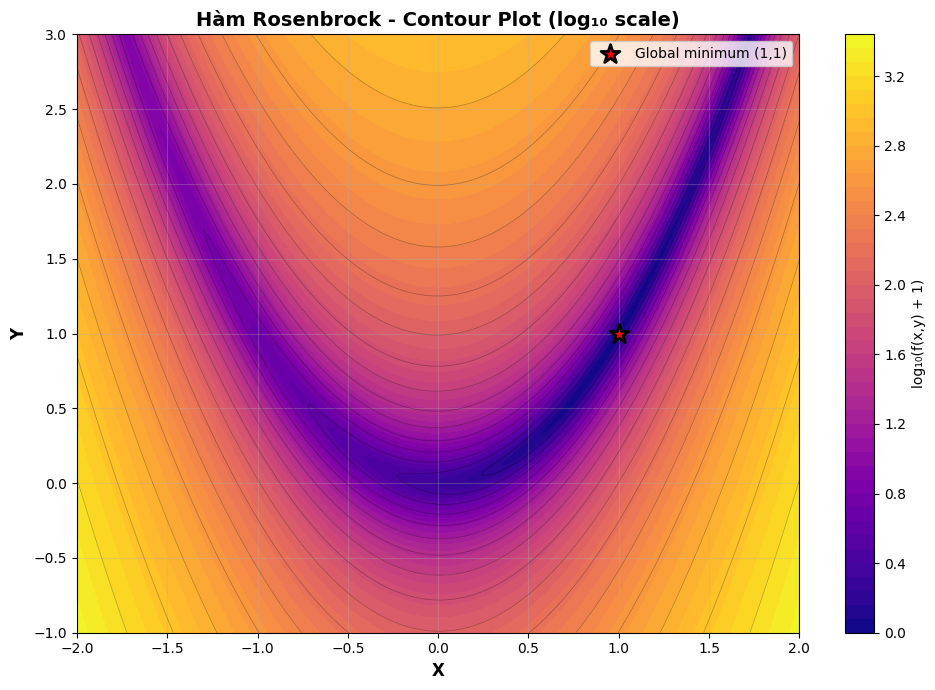

📈 Biểu đồ contour hàm Rosenbrock đã được vẽ!
   Lưu ý: Sử dụng thang log để thấy rõ thung lũng hẹp dạng parabol


In [53]:
# Vẽ contour plot cho hàm Rosenbrock
fig, ax = plt.subplots(figsize=(10, 7))

# Sử dụng log scale cho dễ quan sát
Z_rosen_log_contour = np.log10(Z_rosen + 1)
contour = ax.contourf(X_rosen, Y_rosen, Z_rosen_log_contour, levels=50, cmap='plasma')
ax.contour(X_rosen, Y_rosen, Z_rosen_log_contour, levels=20, colors='black', linewidths=0.5, alpha=0.3)

# Đánh dấu điểm cực tiểu toàn cục (1, 1)
ax.scatter([1], [1], color='red', s=200, marker='*', 
           label='Global minimum (1,1)', edgecolors='black', linewidths=2, zorder=5)

ax.set_xlabel('X', fontsize=12, fontweight='bold')
ax.set_ylabel('Y', fontsize=12, fontweight='bold')
ax.set_title('Hàm Rosenbrock - Contour Plot (log₁₀ scale)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Thêm colorbar với label
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('log₁₀(f(x,y) + 1)', fontsize=10)

plt.tight_layout()
plt.show()

print("📈 Biểu đồ contour hàm Rosenbrock đã được vẽ!")
print("   Lưu ý: Sử dụng thang log để thấy rõ thung lũng hẹp dạng parabol")

## So sánh đặc điểm của 2 hàm

| Đặc điểm | Hàm Ackley | Hàm Rosenbrock |
|----------|------------|----------------|
| **Độ khó tối ưu** | Khó - Nhiều cực trị cục bộ | Khó - Thung lũng hẹp và cong |
| **Cực tiểu toàn cục** | (0, 0, ..., 0) | (1, 1, ..., 1) |
| **Giá trị tối ưu** | f = 0 | f = 0 |
| **Bề mặt** | Gồ ghề, nhiều đỉnh nhỏ | Thung lũng hình parabol |
| **Thách thức** | Thoát khỏi cực trị cục bộ | Di chuyển trong thung lũng hẹp |
| **Ứng dụng** | Kiểm tra khả năng tìm kiếm toàn cục | Kiểm tra khả năng hội tụ |

In [54]:
# Kiểm tra giá trị hàm tại các điểm cực tiểu
print("=" * 60)
print("KIỂM TRA GIÁ TRỊ TẠI ĐIỂM CỰC TIỂU")
print("=" * 60)

# Hàm Ackley
ackley_at_origin = ackley_function(0, 0)
print(f"\n📍 Hàm Ackley tại (0, 0): f(0, 0) = {ackley_at_origin:.10f}")
print(f"   → Gần bằng 0? {np.isclose(ackley_at_origin, 0, atol=1e-10)}")

# Hàm Rosenbrock
rosenbrock_at_one = rosenbrock_function(1, 1)
rosenbrock_at_origin = rosenbrock_function(0, 0)
print(f"\n📍 Hàm Rosenbrock tại (1, 1): f(1, 1) = {rosenbrock_at_one:.10f}")
print(f"   → Đây là điểm cực tiểu toàn cục ✓")
print(f"\n📍 Hàm Rosenbrock tại (0, 0): f(0, 0) = {rosenbrock_at_origin:.10f}")
print(f"   → KHÔNG phải điểm cực tiểu ✗")

print("\n" + "=" * 60)
print("KẾT LUẬN:")
print("=" * 60)
print("✓ Ackley:     Cực tiểu tại (0, 0, ..., 0) với f = 0")
print("✓ Rosenbrock: Cực tiểu tại (1, 1, ..., 1) với f = 0")
print("=" * 60)

KIỂM TRA GIÁ TRỊ TẠI ĐIỂM CỰC TIỂU

📍 Hàm Ackley tại (0, 0): f(0, 0) = 0.0000000000
   → Gần bằng 0? True

📍 Hàm Rosenbrock tại (1, 1): f(1, 1) = 0.0000000000
   → Đây là điểm cực tiểu toàn cục ✓

📍 Hàm Rosenbrock tại (0, 0): f(0, 0) = 1.0000000000
   → KHÔNG phải điểm cực tiểu ✗

KẾT LUẬN:
✓ Ackley:     Cực tiểu tại (0, 0, ..., 0) với f = 0
✓ Rosenbrock: Cực tiểu tại (1, 1, ..., 1) với f = 0


## Kiểm tra giá trị tại điểm cực tiểu